In [68]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import measure
from skimage import io
from skimage.filters import threshold_otsu
from skimage import feature
from skimage.color import rgb2gray
from skimage import filters




In [54]:
left = io.imread("ManualMask/leftMask/MCUCXR_0001_0.png")
right = io.imread("ManualMask/rightMask/MCUCXR_0001_0.png")

In [55]:
mask = left + right 
inverse_mask = np.invert(mask)

In [56]:
image = io.imread("CXR_png/MCUCXR_0001_0.png")


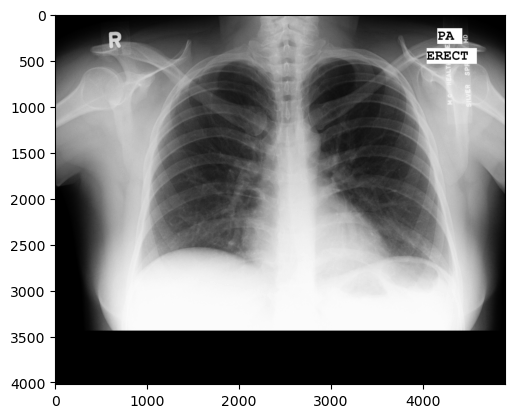

In [58]:
plt.imshow(image, cmap='gray')


In [65]:
canny_edges = feature.canny(image, sigma=0.001, 
                            low_threshold=None, 
                            high_threshold=None, 
                            mask=None, 
                            use_quantiles=False)

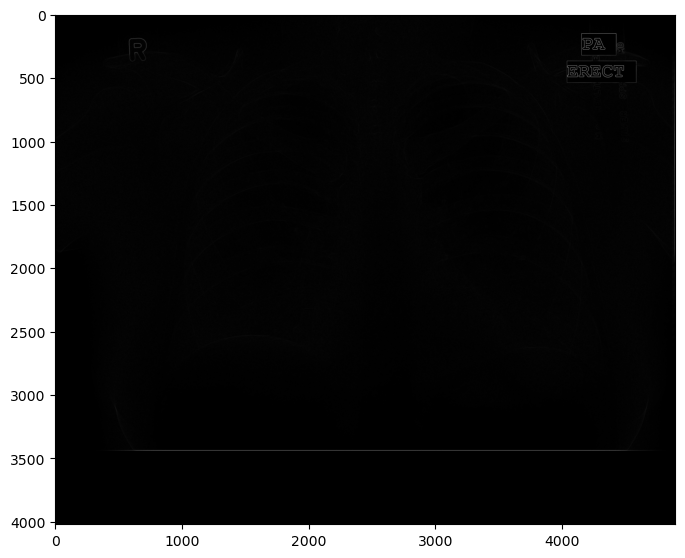

In [69]:
sobel_edges = filters.sobel(image)
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(sobel_edges, cmap=plt.cm.gray)

In [35]:
threshold = threshold_otsu(image)
print(threshold) 
binary = ~(image <= threshold)

117


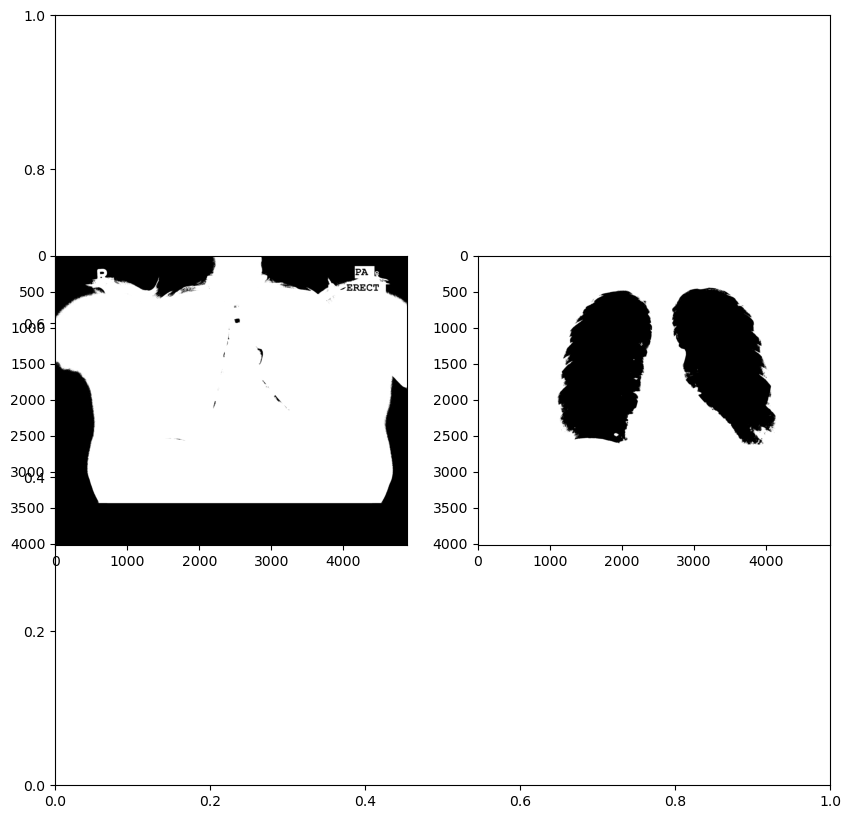

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(binary+mask, cmap='gray')
plt.subplot(1,2, 2)
plt.imshow(binary+inverse_mask, cmap='gray')
plt.show()

In [42]:

total = np.shape(inverse_mask)

size = np.shape(binary)

print(total)

print(size)

count = total[0]*total[1] - np.count_nonzero(inverse_mask)

print(count)

print(total[0]*total[1])

check = inverse_mask + binary

count1 = total[0]*total[1] - np.count_nonzero(check)


output = count1/count


(4020, 4892)
(4020, 4892)
4753493
19665840


In [44]:
print(output)

0.8176040229784708


In [71]:
PATCH_SIZE = 15

# select some patches from stroma areas of the tma image
stroma_locations = [(20, 20), (240, 20), (32, 370), (140, 460)]
stroma_patches = []
for loc in stroma_locations:
    stroma_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
gland_locations = [(210, 410), (150, 330), (290, 450), (450, 470)]
gland_patches = []
for loc in gland_locations:
    gland_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

In [ ]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(stroma_patches):
    ax = fig.add_subplot(2, len(stroma_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Stroma %d' % (i + 1))

for i, patch in enumerate(gland_patches):
    ax = fig.add_subplot(2, len(stroma_patches), len(stroma_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Gland %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

what percentage of true space we have founds, but doesnt tell us us what we have identifed as lung that isnt lung 